<a href="https://colab.research.google.com/github/netoquimico/Pythonworks/blob/main/Base_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from google.colab import drive

In [3]:
base_credit=pd.read_csv('/content/credit_risk_dataset.csv')

https://www.kaggle.com/datasets/laotse/credit-risk-dataset

In [4]:
base_credit

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Deleting unnecessary columns**

In [5]:
base_credit.drop('person_home_ownership', axis=1, inplace=True)

In [6]:
base_credit.drop('person_emp_length', axis=1, inplace=True)
base_credit.drop('loan_intent', axis=1, inplace=True)
base_credit.drop('loan_grade', axis=1, inplace=True)

In [7]:
base_credit.drop('loan_int_rate', axis=1, inplace=True)
base_credit.drop('loan_percent_income', axis=1, inplace=True)
base_credit.drop('cb_person_default_on_file', axis=1, inplace=True)
base_credit.drop('cb_person_cred_hist_length', axis=1, inplace=True)

In [8]:
base_credit.head()

,person_age,person_income,loan_amnt,loan_status
0,22,59000,35000,1
1,21,9600,1000,0
2,25,9600,5500,1
3,23,65500,35000,1
4,24,54400,35000,1


In [9]:
base_credit.tail()

,person_age,person_income,loan_amnt,loan_status
32576,57,53000,5800,0
32577,54,120000,17625,0
32578,65,76000,35000,1
32579,56,150000,15000,0
32580,66,42000,6475,0


## **Inconsistent data handling**

In [11]:
base_credit.loc[base_credit['person_age']<0]

,person_age,person_income,loan_amnt,loan_status


In [12]:
base_credit.loc[base_credit['person_age']>100]

,person_age,person_income,loan_amnt,loan_status
81,144,250000,4800,0
183,144,200000,6000,0
575,123,80004,20400,0
747,123,78000,20000,0
32297,144,6000000,5000,0


In [14]:
base_credit2= base_credit.drop(base_credit[base_credit['person_age'] > 100].index)

In [15]:
base_credit2

,person_age,person_income,loan_amnt,loan_status
0,22,59000,35000,1
1,21,9600,1000,0
2,25,9600,5500,1
3,23,65500,35000,1
4,24,54400,35000,1
...,...,...,...,...
32576,57,53000,5800,0
32577,54,120000,17625,0
32578,65,76000,35000,1
32579,56,150000,15000,0


In [16]:
base_credit2.loc[base_credit['person_age']>100]

,person_age,person_income,loan_amnt,loan_status


In [20]:
base_credit2.isnull().sum()

person_age       0
person_income    0
loan_amnt        0
loan_status      0
dtype: int64

##  Predictors and class split

In [21]:
type(base_credit2)

pandas.core.frame.DataFrame

In [22]:
X_credit=base_credit2.iloc[:,0:3].values

In [23]:
Y_credit = base_credit2.iloc[:,3].values

## **Normalization values**

In [24]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [25]:
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(-1.2438638905517996, -1.1779405316576799, -1.4377443770407878)

In [26]:
X_credit[:,0].max(), X_credit[:,1].max(), X_credit[:,2].max()

(10.682205511601307, 37.573667575291424, 4.019570880913998)

## **Training base and test base**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_credit_training, X_credit_test, Y_credit_training, Y_credit_test = train_test_split(X_credit, Y_credit, test_size = 0.25, random_state = 0)

In [30]:
X_credit_training.shape

(24432, 3)

In [31]:
Y_credit_training.shape

(24432,)

In [32]:
X_credit_test.shape

(8144, 3)

# **Save the variables**

In [33]:
import pickle

In [34]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_credit_training, Y_credit_training, X_credit_test, Y_credit_test], f)

## **Naive Bayes**

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
naive_risk_credit = GaussianNB()
naive_risk_credit.fit(X_credit_training, Y_credit_training)

GaussianNB()

In [37]:
prevision = naive_risk_credit.predict(X_credit_test)

In [38]:
prevision

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
Y_credit_test

array([1, 0, 0, ..., 0, 1, 0])

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
accuracy_score(Y_credit_test, prevision)

0.7929764243614931

In [42]:
from yellowbrick.classifier import ConfusionMatrix

0.7929764243614931

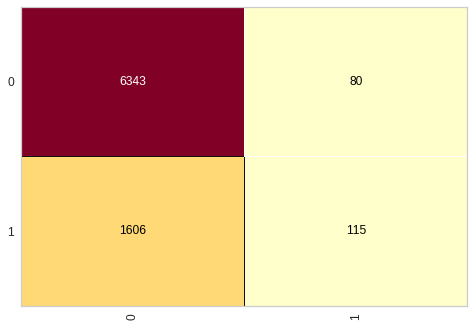

In [44]:
cm = ConfusionMatrix(naive_risk_credit)
cm.fit(X_credit_training, Y_credit_training)
cm.score(X_credit_test, Y_credit_test)

In [45]:
print(classification_report(Y_credit_test, prevision))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      6423
           1       0.59      0.07      0.12      1721

    accuracy                           0.79      8144
   macro avg       0.69      0.53      0.50      8144
weighted avg       0.75      0.79      0.72      8144

